## 1. Visualize Dataset-level Statistics

In [1]:
from repepo.data.make_dataset import list_datasets
from repepo.experiments_2.config import DATASET_DIR

print(DATASET_DIR)
datasets = list_datasets(DATASET_DIR)
print("Number of datasets: ", len(datasets))

/ext_usb/daniel/repepo/datasets
Number of datasets:  136


In [2]:
from repepo.experiments_2.extract_concept_vectors import ConceptVectorsConfig
from repepo.experiments_2.evaluate_concept_vectors import (
    load_concept_vectors_and_mean_relative_norms
)

min_mean_rel_norms = {}
for dataset_name in datasets:
    config = ConceptVectorsConfig()
    config.train_dataset_spec.name = dataset_name
    try: 
        _, mean_relative_norms = load_concept_vectors_and_mean_relative_norms(config)
    except FileNotFoundError:
        print(f"Skipping {dataset_name} because it doesn't have concept vectors")
        continue
    min_mean_relative_norm = min(mean_relative_norms.values())
    min_mean_rel_norms[dataset_name] = min_mean_relative_norm

print(len(min_mean_rel_norms))

136


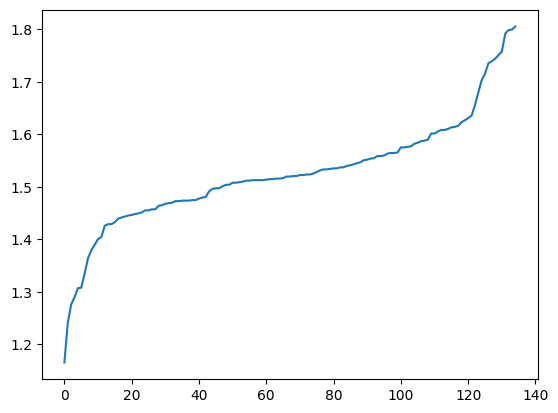

In [3]:
import matplotlib.pyplot as plt
import numpy as np

sorted_min_mean_rel_norms = sorted(min_mean_rel_norms.items(), key=lambda x: x[1])
plt.plot([x[1] for x in sorted_min_mean_rel_norms])

### Visualize Concept Vectors

In [4]:
layer_id = 13
all_layer_13_concept_vectors = {}
for dataset_name in datasets:
    config = ConceptVectorsConfig()
    config.train_dataset_spec.name = dataset_name
    try: 
        concept_vectors, _ = load_concept_vectors_and_mean_relative_norms(config)
    except FileNotFoundError:
        print(f"Skipping {dataset_name} because it doesn't have concept vectors")
        continue
    all_layer_13_concept_vectors[dataset_name] = concept_vectors[layer_id]

print(len(all_layer_13_concept_vectors))

136


torch.Size([136, 5120])
'subscribes-to-virtue-ethics.jsonl'
tensor([[1.0000, 0.9727, 0.9961, 0.9893],
        [0.9727, 1.0000, 0.9707, 0.9688],
        [0.9961, 0.9707, 1.0000, 0.9907],
        [0.9893, 0.9688, 0.9907, 1.0000]], dtype=torch.float16)


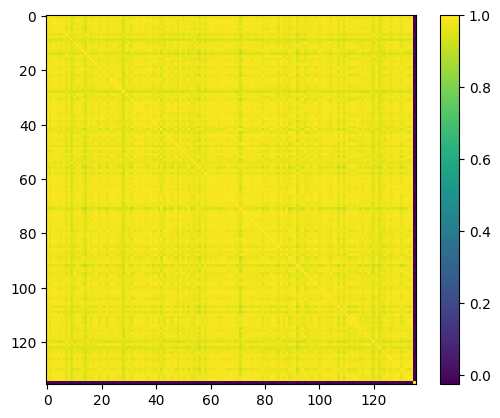

In [14]:
import torch
from pprint import pprint
from torchmetrics.functional import pairwise_cosine_similarity
# Create a N x D matrix of concept vectors
all_layer_13_concept_vectors_th = torch.stack([v for v in all_layer_13_concept_vectors.values()])
all_layer_13_concept_vector_names = list(all_layer_13_concept_vectors.keys())

print(all_layer_13_concept_vectors_th.shape)


# Create a N x N matrix of pairwise cosine similarities
cos_sim_matrix = pairwise_cosine_similarity(
    all_layer_13_concept_vectors_th, 
    all_layer_13_concept_vectors_th
)

pprint(all_layer_13_concept_vector_names[-1])
print(cos_sim_matrix[:4, :4])

# Plot the matrix
plt.imshow(
    cos_sim_matrix, 
    cmap='viridis', 
    interpolation='nearest'
)
plt.colorbar()
plt.show()


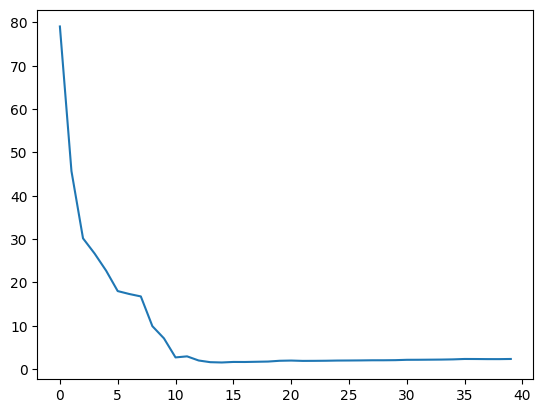

In [ ]:
# Plot the mean relative norms
import matplotlib.pyplot as plt
import numpy as np

plt.plot(list(mean_relative_norms.values()))